# Topologies

We show here numbers and sizes of components for different problems, cardinalities, generating sets, and measures.

In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt

import numpy as np
from sympy.utilities.iterables import multiset_permutations

from utils import random_sp, random_tsp, phi, psi, nswap_generators, lswap_generators, build_curve, k_opt_generators

The following function takes an instance of a problem `p`, a generating set `G` and a measure `measure`
and returns a list of pairs (one for each component) in which the 1st items are the measure of the sink of each component
and the 2nd items are the number of points in  that component.

This function has to measure every single point in the solution space,
and thus, can only be used with instances of the problems with low cardinalities.

In [2]:
def components(p, G, measure):
    n = len(list(p))
    if callable(G):
        G = G(n)
    comps_dict = defaultdict(int)
    seen = set()
    for s in multiset_permutations(p):
        if tuple(s) in seen:
            continue
        path = build_curve(np.array(s), G, measure)
        m = measure(path[-1])
        k = round(m, 6)
        for node in path:
            tnode = tuple(node)
            if tnode in seen:
                continue
            else:
                comps_dict[k] += 1
                seen.add(tnode)
    comps = list(comps_dict.items())
    comps.sort(key=lambda c: c[0])
    return comps

As an example, we can check the components of instances of the TSP with 9 cities,
with contiguous transpositions as `G` and psi as `measure`

In [3]:
n = 9
G = nswap_generators(n)

for _ in range(5):
    p = random_tsp(n)
    print(components(p, G, psi))

[(1.211964, 53388), (1.404738, 9342), (1.435537, 26388), (1.48102, 8820), (1.540301, 21636), (1.566393, 11088), (1.599862, 9018), (1.628312, 4752), (1.643822, 11088), (1.66234, 5832), (1.677192, 10476), (1.70138, 8298), (1.704594, 5310), (1.732805, 5562), (1.745896, 3546), (1.751871, 1350), (1.761918, 1962), (1.841842, 1962), (1.914826, 2628), (2.042454, 1512), (2.069843, 1710), (2.077651, 1332), (2.108721, 1278), (2.110337, 630), (2.136429, 1908), (2.160158, 792), (2.169406, 594), (2.184643, 972), (2.187455, 1584), (2.199944, 1026), (2.201662, 684), (2.211396, 738), (2.215713, 954), (2.273141, 630), (2.284013, 1512), (2.287019, 1890), (2.287501, 1368), (2.288974, 414), (2.290332, 1512), (2.298045, 1764), (2.311769, 1260), (2.329204, 432), (2.339272, 1476), (2.349285, 1602), (2.350376, 1170), (2.359439, 414), (2.363597, 684), (2.36982, 1530), (2.374659, 1854), (2.379256, 1494), (2.383576, 1854), (2.38689, 1476), (2.397608, 1818), (2.398794, 468), (2.40463, 1638), (2.405037, 1782), (2.4

[(1.710273, 64098), (1.988005, 3438), (2.03295, 3348), (2.121501, 4644), (2.127867, 3708), (2.140921, 2718), (2.156516, 3312), (2.168579, 4572), (2.203719, 4626), (2.232368, 3816), (2.236336, 3312), (2.241863, 4014), (2.25313, 2358), (2.256652, 3906), (2.2585, 5418), (2.259321, 2160), (2.26086, 2556), (2.270702, 6840), (2.286979, 3006), (2.29253, 9324), (2.294515, 2970), (2.298359, 2214), (2.308063, 4194), (2.312087, 4950), (2.339744, 3006), (2.34068, 2844), (2.344245, 2916), (2.347338, 1134), (2.350611, 1800), (2.351781, 2106), (2.35273, 4284), (2.356698, 1692), (2.367107, 2574), (2.37464, 3276), (2.386021, 4986), (2.400344, 4230), (2.408301, 1764), (2.423793, 2124), (2.425231, 2340), (2.427406, 4968), (2.429528, 1296), (2.446318, 1854), (2.466493, 1404), (2.485507, 2718), (2.496888, 2862), (2.517509, 3852), (2.538273, 2700), (2.552458, 2106), (2.559309, 6138), (2.582534, 2862), (2.585627, 2736), (2.627065, 1638), (2.668415, 3726), (2.722441, 1854), (2.728701, 1494), (2.731806, 2484),

The following function uses the previous `components` function
to produce a sample of size `size` with random instances of problems given by `pfun`,
generating sets given by `genfun`, and measure `measure`.

In [3]:
def components_random_sample(n, pfun, genfun, measure, size):
    sample = []
    G = genfun(n)
    for _ in range(size):
        p = pfun(n)
        #print(f"New problem of size {n}")
        comps = components(p, G, measure)
        sample.append(comps)
    return sample

The following function uses the previous to construct sets of samples,
of instances of the problems starting with cardinality 2 and ending with `maxn`.

In [4]:
def components_random_sampleset(maxn, pfun, genfun, measure, size):
    samples = []
    for n in range(2, maxn):
        #print(f"Now samples of size {n}")
        sample = components_random_sample(n, pfun, genfun, measure, size)
        samples.append(sample)
    return samples

The following function uses the previous to plot the sets of samples.

In [5]:
def plot_sampleset(maxn, pfun, genfun, measure, size):
    sampleset = components_random_sampleset(maxn, pfun, genfun, measure, size)
    means, stds = [], []
    for sample in sampleset:
        comps = [len(c) for c in sample]
        means.append(np.mean(comps))
        stds.append(np.std(comps))
    plt.errorbar(np.arange(2, len(means) + 2), means, stds, linestyle='None', marker='^')
    return sampleset

Partial applications of `k_opt_generators`.

In [6]:
def opt_2_gens(n):
    return k_opt_generators(n, 2)

def opt_3_gens(n):
    return k_opt_generators(n, 3)

def opt_4_gens(n):
    return k_opt_generators(n, 4)

Now we use all the above to plot for different types of problem, generating sets, and measures.

First we check for the SP, using the `phi` measure,
and both contiguous transpositions or transpositions in general as generating sets.
Since the SP is solved in this way, we obtain flat lines at $1$:

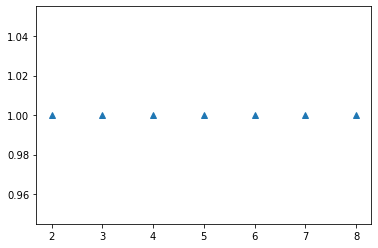

In [8]:
sampleset5 = plot_sampleset(9, random_sp, nswap_generators, phi, 5)

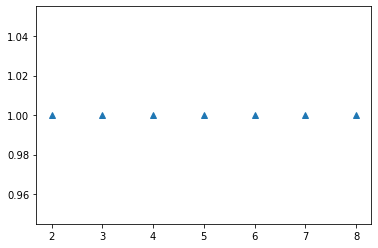

In [9]:
sampleset6 = plot_sampleset(9, random_sp, lswap_generators, phi, 5)

If instead we use a 2-opt set of generators,
we soon see that the solution spaces are broken up into components:

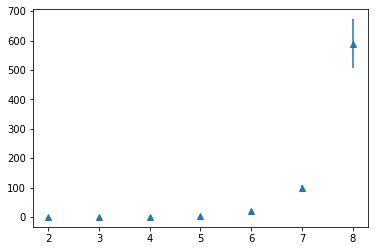

In [10]:
sampleset9 = plot_sampleset(9, random_sp, opt_2_gens, phi, 5)

The 3-opt generators solve all instances of the SP though
(after all, the set includes all contiguous transpositions):

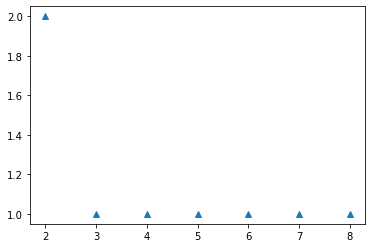

In [11]:
sampleset10 = plot_sampleset(9, random_sp, opt_3_gens, phi, 5)

We can also see that if we use, with instances of the SP, the `psi` rather than the `phi` measure,
the generating sets that solved the problem no longer do:

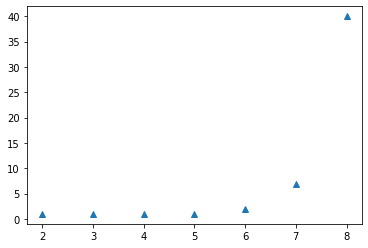

In [12]:
sampleset3 = plot_sampleset(9, random_sp, nswap_generators, psi, 5)

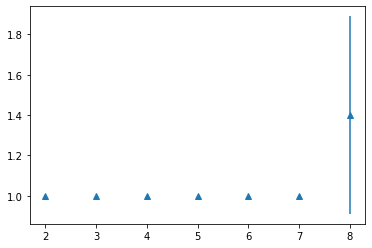

In [13]:
sampleset4 = plot_sampleset(9, random_sp, lswap_generators, psi, 5)

Now, for the TSP, we can easily show that none of the generating sets,
combined with the `psi` measure, solves all instances,
though for higher complexities of the generating sets,
it gets closer and closer.
For example, for 8 cities, 3-opt generally solves it.

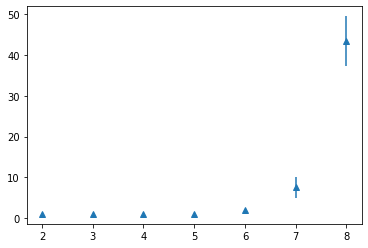

In [14]:
sampleset = plot_sampleset(9, random_tsp, nswap_generators, psi, 5)

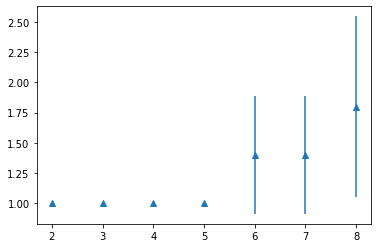

In [15]:
sampleset2 = plot_sampleset(9, random_tsp, lswap_generators, psi, 5)

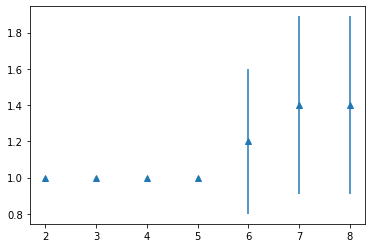

In [16]:
sampleset6 = plot_sampleset(9, random_tsp, opt_2_gens, psi, 5)

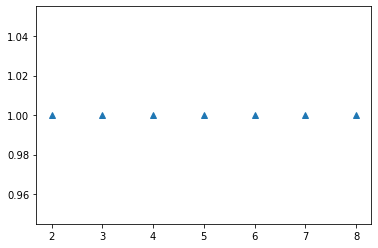

In [7]:
sampleset7 = plot_sampleset(9, random_tsp, opt_3_gens, psi, 5)